# **Project-1: General EDA**

## **1.Load Dataset and Initial Expression**

In [8]:
import pandas as pd
import numpy as np
#Load the
data = pd.read_csv(r"D:\Projects\Task2\Global_Superstore2.csv",encoding='latin1');
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [11]:
data.shape

(51290, 24)

In [12]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## **2.Data Cleaning**

In [13]:
#Handling Missing values
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [15]:
data["Postal Code"] = data["Postal Code"].fillna(data['Postal Code'].median())

In [16]:
df = data.drop_duplicates()


In [19]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR)))]

## **3.Stastical analysis**

In [21]:
print("Mean Sales:", df['Sales'].mean())
print("Standard Deviation:", df['Sales'].std())
print("Correlation Matrix:\n", df.corr(numeric_only=True))

Mean Sales: 121.65985873299006
Standard Deviation: 131.53324664867569
Correlation Matrix:
                  Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000    -0.009282 -0.095230 -0.185495  0.091249 -0.042493   
Postal Code   -0.009282     1.000000  0.002954  0.005720  0.022234 -0.012327   
Sales         -0.095230     0.002954  1.000000  0.260152 -0.119955  0.203583   
Quantity      -0.185495     0.005720  0.260152  1.000000 -0.007512  0.047734   
Discount       0.091249     0.022234 -0.119955 -0.007512  1.000000 -0.518936   
Profit        -0.042493    -0.012327  0.203583  0.047734 -0.518936  1.000000   
Shipping Cost -0.070618     0.003273  0.755296  0.196027 -0.089744  0.157021   

               Shipping Cost  
Row ID             -0.070618  
Postal Code         0.003273  
Sales               0.755296  
Quantity            0.196027  
Discount           -0.089744  
Profit              0.157021  
Shipping Cost       1.000000  


## **4.Data Visualization**

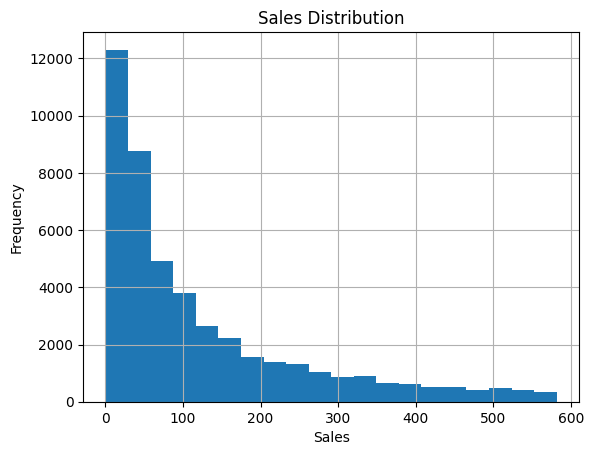

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df['Sales'].hist(bins=20)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

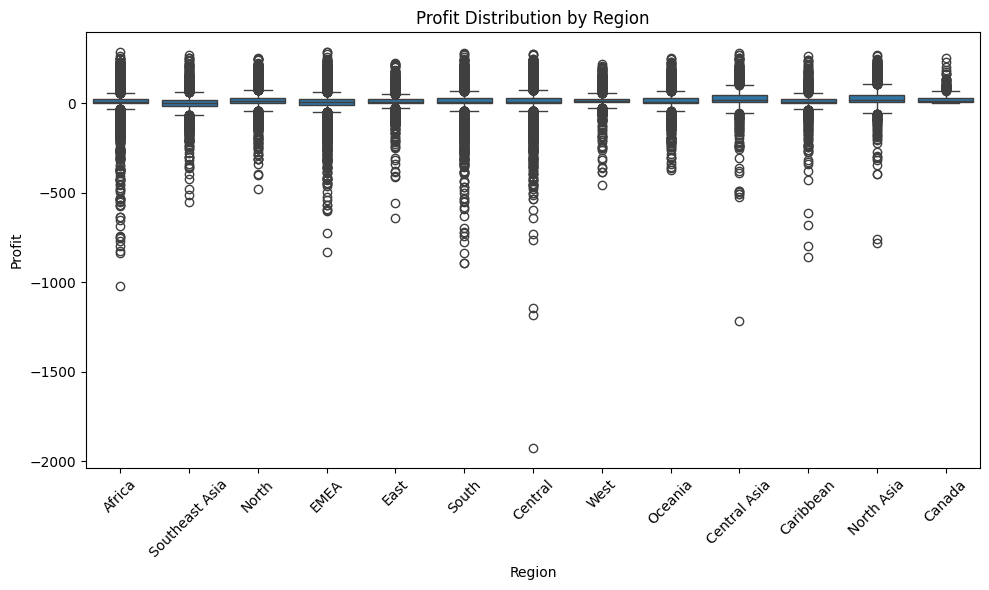

In [27]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Profit', data=df)
plt.title("Profit Distribution by Region")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

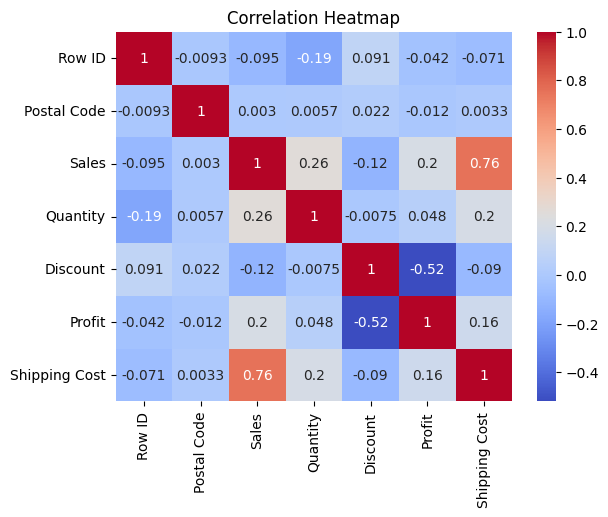

In [25]:
# Heatmap
sns.heatmap( df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()